# **Data Analysis and Visualizations:**
This notebook is part 2 of analyzing the Salary Survey that was conducted on TikTok. The first notebook focused on cleaning the data and categorizing all columns. 

In this notebook, the goal is to further analyze the cleaned dataset to explore salary distributions, average salary by various demographics (age range, Experience, gender, education, industry, and job title), and the distribution of survey participants by gender and age group.

Moving on to the Data Analysis and Visualization phase, we aim to derive insights from the dataset based on the cleaned and partially standardized data. Our analysis will cover several key areas:
1. **Participant Demographics:** Examine the distribution of survey participants by gender and break down the number of participants into age groups.
2. **Salary Distributions:** Explore the overall distribution of salaries, including annual and sign-on bonuses.
3. **Average Salary by Demographics:** Analyze average salaries by age range, Experience, gender, education, industry (with the caveat of partial standardization), and job title.
4. Further Exploration/visualizations between variables enhancing our ability to interpret the data.

In [1]:
#importing libraries
import pandas as pd
pd.set_option('display.width', 1000) # Set the display width to a large value to prevent line wrapping
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np


# reading the data
df = pd.read_csv('Cleaned_SalSur.csv')

Before moving on to visualizations, first convert "Experience", "Annual Salary", "Annual Bonus", and "Signon Bonus" and "Experience" to numeric types if they aren't already, ensuring no non-numeric characters interfere. 

Then display first 5 rows

In [2]:
print(df.head())
#print(df.info())

  Age Range  Experience            Industry                Job Title            Education         Country  Annual Salary  Annual Bonus  Signon Bonus  Gender
0     18-21           1          Consulting  Business Office Manager    Bachelor's Degree          Canada        31042.2          0.00           0.0  Female
1     18-21           1              Retail      Account Coordinator    Bachelor's Degree   United States        37000.0       1200.00           0.0  Female
2     18-21           1  Air Transportation                 Engineer    Bachelor's Degree   United States        75000.0          0.00        3000.0  Female
3     18-21           1          Accounting               Controller         No Schooling  United Kingdom        24862.5        318.75           0.0  Female
4     18-21           1          Accounting               Accountant  High School Diploma     Netherlands        32664.0       2395.36           0.0  Female


# Step 1: Participant Demographics
Let's begin by first examining the distribution of survey participants by age groups and break down the number of participants by gender, providing a clearer picture of the survey's demographic makeup.

1. Distribution by Age Group: The plot highlights how survey participation is distributed across different age ranges. This distribution can provide insights into the workforce demographics engaged with the platform used for the survey, potentially indicating a skew towards certain age groups.

2. Distribution by Gender: The bar plot showcases the distribution of survey participants across different genders. It's important to interpret this distribution in the context of the survey's reach and potential biases in participation across genders. The representation of genders might also reflect industry-specific trends.

3. Distribution by Country: 71 countries were involved in the survey with most participants from the US and the top 4 from Canada, Australia, United Kingdom and Ireland.


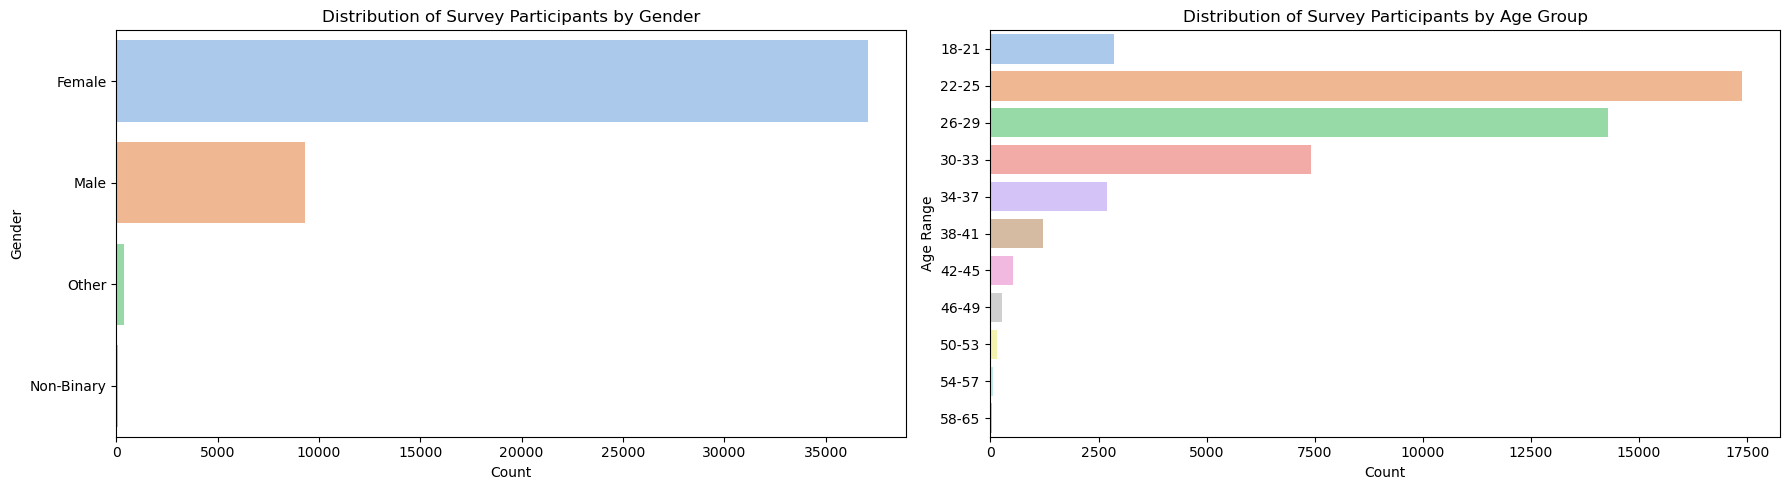

Country  United States  Canada  Australia  United Kingdom  Ireland  Germany  New Zealand  Netherlands  Singapore  Switzerland  Philippines  Mexico  France  Belgium  Spain  Norway  Malaysia  Russia  South Africa  Lithuania
Count            42408    2513        870             409      153       91           87           51         42           21           15      14      13       11     11      10        10       9             8          8


United States     42408
Canada             2513
Australia           870
United Kingdom      409
Ireland             153
                  ...  
Egypt                 1
Cambodia              1
Guatemala             1
Colombia              1
Lebanon               1
Name: Country, Length: 76, dtype: int64

In [2]:
# Participant Demographics: Distribution by Gender and Age Group

# Distribution by Gender
gender_distribution = df['Gender'].value_counts().reset_index()
gender_distribution.columns = ['Gender', 'Count']

# Distribution by Age Group
age_group_distribution = df['Age Range'].value_counts().reset_index()
age_group_distribution.columns = ['Age Range', 'Count']
age_group_distribution = age_group_distribution.sort_values('Age Range')



# Plotting the results for a visual representation
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

# 1.Distribution by Gender
sns.barplot(x='Count', y='Gender', data=gender_distribution, ax=ax[0], palette='pastel')
ax[0].set_title('Distribution of Survey Participants by Gender')
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Gender')

# 2.Distribution by Age Group
sns.barplot(x='Count', y='Age Range', data=age_group_distribution, ax=ax[1], palette='pastel')
ax[1].set_title('Distribution of Survey Participants by Age Group')
ax[1].set_xlabel('Count')
ax[1].set_ylabel('Age Range')
plt.tight_layout()
plt.show()


# 3.Distribution by Country
country_distribution = df['Country'].value_counts().reset_index()
country_distribution.columns = ['Country', 'Count']

#top 20 ountries in survey
pivot_table = country_distribution[:20].set_index('Country').T
print(pivot_table)

#total number of countries
df['Country'].value_counts()

The visualizations offer insights into the survey's demographic makeup regarding age groups and gender.

**Insights**
- **Distribution of Survey Participants by Gender:**

The majority of survey participants identify as Female, making it the most represented gender in the dataset.The number of participants identifying as Male is significantly lower than Female, but still constitutes a considerable portion of the dataset.Very few participants have identified as Non-Binary or Other, indicating these groups are underrepresented in the survey.

Distribution of Survey Participants by Age Group:
The age groups 22-25 and 26-29 are the most represented in the survey, suggesting a younger demographic of participants.
The representation decreases with increasing age, with age groups above 46 having notably fewer participants.
The least represented age groups are those above 54, which may reflect lower participation rates among older demographics or could be reflective of the survey's target audience.

- **Country Demographics**

The survey dataset's country distribution summary highlights a significant skew towards U.S.-based participants, with the United States having 42,408 respondents, making it the largest group by a considerable margin. Canada and Australia follow as the next most represented countries, with 2,513 and 870 respondents, respectively. The United Kingdom and Ireland have a moderate presence, with 409 and 153 respondents. Germany to the Netherlands range from 91 to 51 respondents, indicating a lower representation. Countries like Singapore, Switzerland, and Lithuania have the fewest respondents, all below 50, signifying underrepresentation in the dataset.

**Issues**

- **Class Imbalance:** There's a clear class imbalance in the gender variable, which could affect the performance of machine learning models if the target variable is related to gender. This imbalance needs to be accounted for during analysis or predictive modeling.

- **Demographic Representation:** The skewed distribution in age groups might indicate that the conclusions drawn from this survey are more reflective of younger individuals' salaries and experiences. This should be taken into consideration when generalizing findings to the entire population.

# Step 2: Salary Distributions
Continue by examining the distribution of annual salaries, annual bonuses, and sign-on bonuses. I'll be using histograms to visualize these distributions, providing a clear view of the salary and bonus ranges among survey participants. 

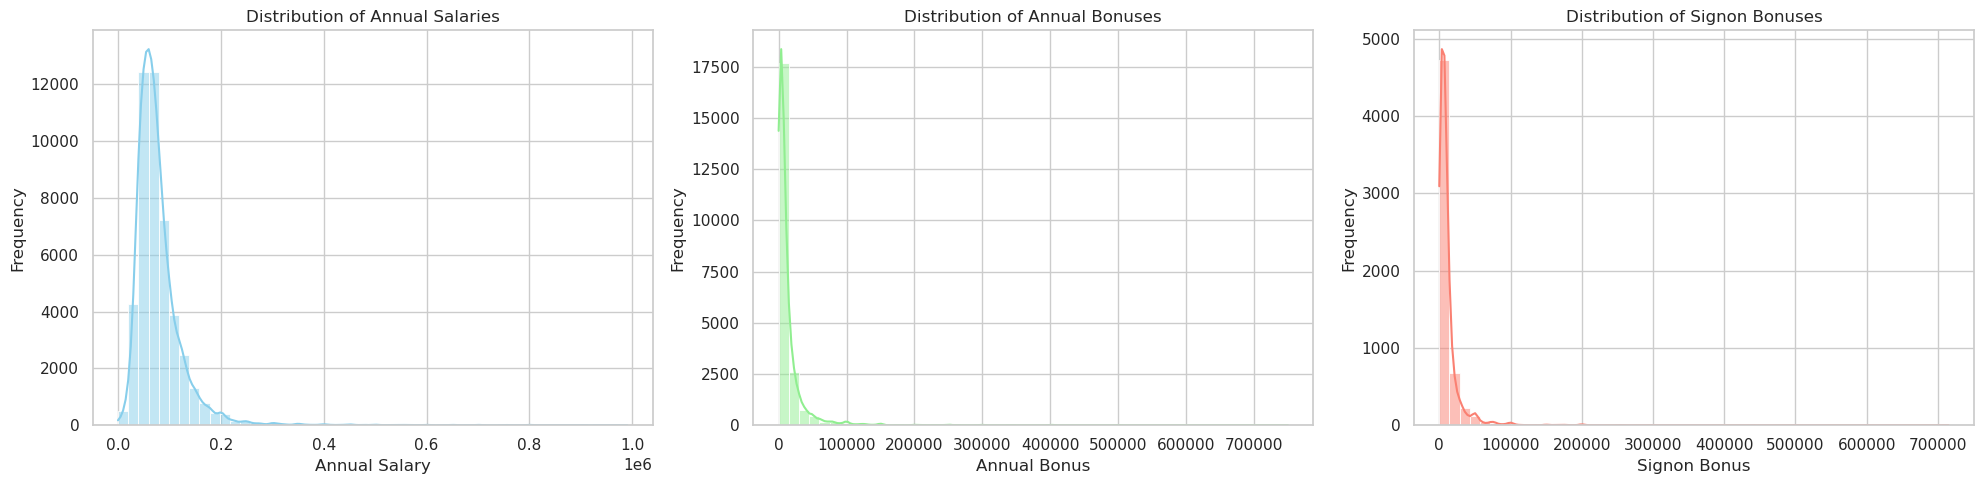

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot distributions for Annual Salary, Annual Bonus, and Signon Bonus
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# Annual Salary Distribution
sns.histplot(df['Annual Salary'], bins=50, kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of Annual Salaries')
ax[0].set_xlabel('Annual Salary')
ax[0].set_ylabel('Frequency')

# Annual Bonus Distribution
sns.histplot(df[df['Annual Bonus'] > 0]['Annual Bonus'], bins=50, kde=True, ax=ax[1], color='lightgreen')
ax[1].set_title('Distribution of Annual Bonuses')
ax[1].set_xlabel('Annual Bonus')
ax[1].set_ylabel('Frequency')

# Signon Bonus Distribution
sns.histplot(df[df['Signon Bonus'] > 0]['Signon Bonus'], bins=50, kde=True, ax=ax[2], color='salmon')
ax[2].set_title('Distribution of Signon Bonuses')
ax[2].set_xlabel('Signon Bonus')
ax[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


The histograms provide insights into the distribution of Annual Salaries, Annual Bonuses, and Signon Bonuses among survey participants:

1. Annual Salaries: The distribution appears right-skewed, indicating that a majority of participants have salaries on the lower end of the spectrum, with fewer individuals earning higher salaries. This pattern is common in salary data, reflecting broader socio-economic dynamics.

2. Annual Bonuses: Similarly, the distribution of annual bonuses is right-skewed, with most participants receiving lower bonuses. The presence of bonuses across various ranges suggests variability in compensation structures across different industries and roles.

3. Signon Bonuses: The distribution of signon bonuses shows that while many participants did not receive a signon bonus, there's a wide range of bonus amounts for those who did. This variability could be influenced by job level, industry, or negotiation skills.

# Step 3: Average Salary by Demographics
Next, we'll analyze average salaries by various demographics including Experience, age range, education level, and gender. This will involve grouping the data accordingly and calculating mean salaries for each group. Due to the partial categorization of the "Industry" and "Job Title" fields, we'll focus on the demographics with more standardized data for accurate insights.

1. Average Salary by Years of Experience:
2. Average Salary by Age Range
3. Average Salary by Education Level
4. Average Salary by Gender

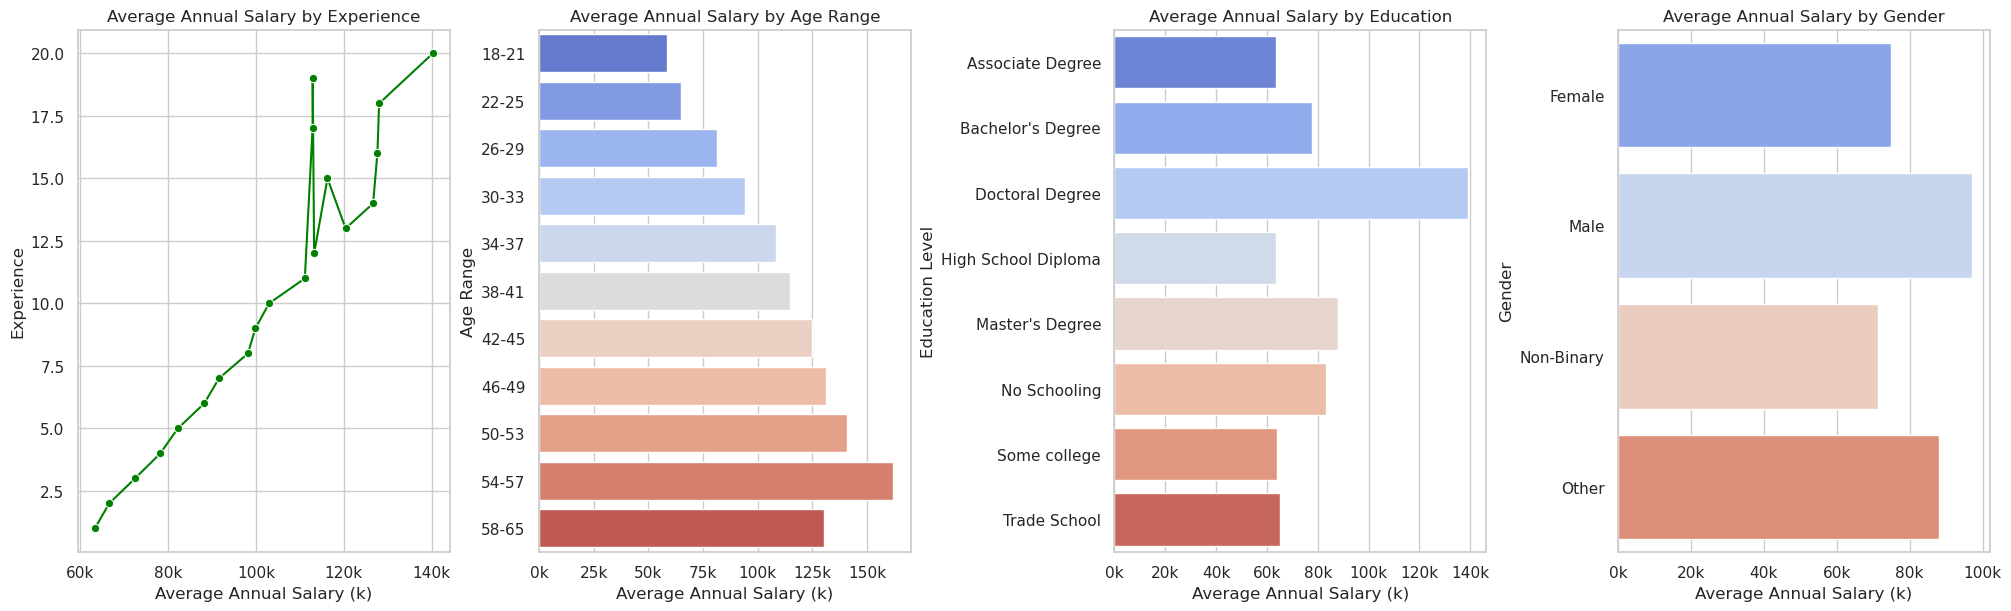

In [15]:
# Group data and calculate mean salaries by various demographics: Age Range, Experience, Gender, and Education Level
import matplotlib.ticker as mticker
# Average Salary by Experience
avg_salary_experience = df.groupby('Experience')['Annual Salary'].mean().reset_index()

# Average Salary by Age Range
avg_salary_age = df.groupby('Age Range')['Annual Salary'].mean().reset_index()

# Average Salary by Education Level
avg_salary_education = df.groupby('Education')['Annual Salary'].mean().reset_index()

# Average Salary by Gender
avg_salary_gender = df.groupby('Gender')['Annual Salary'].mean().reset_index()

# Plotting the results for a visual representation
fig, ax = plt.subplots(1, 4, figsize=(20, 6), constrained_layout=True)

# Formatter function to convert salary to 'k' notation
def k_formatter(x, pos):
    return f'{int(x/1000)}k'

# Apply the formatter to all axes that need it
for axis in ax:
    axis.xaxis.set_major_formatter(mticker.FuncFormatter(k_formatter))

# Average Salary by Experience
sns.lineplot(x='Annual Salary', y='Experience', data=avg_salary_experience, ax=ax[0], marker='o', color='green')
ax[0].set_title('Average Annual Salary by Experience')
ax[0].set_xlabel('Average Annual Salary (k)')
ax[0].set_ylabel('Experience')

# Average Salary by Age Range
sns.barplot(x='Annual Salary', y='Age Range', data=avg_salary_age, ax=ax[1], palette='coolwarm')
ax[1].set_title('Average Annual Salary by Age Range')
ax[1].set_xlabel('Average Annual Salary (k)')
ax[1].set_ylabel('Age Range')

# Average Salary by Education Level
sns.barplot(x='Annual Salary', y='Education', data=avg_salary_education, ax=ax[2], palette='coolwarm')
ax[2].set_title('Average Annual Salary by Education')
ax[2].set_xlabel('Average Annual Salary (k)')
ax[2].set_ylabel('Education Level')

# Average Salary by Gender
sns.barplot(x='Annual Salary', y='Gender', data=avg_salary_gender, ax=ax[3], palette='coolwarm')
ax[3].set_title('Average Annual Salary by Gender')
ax[3].set_xlabel('Average Annual Salary (k)')
ax[3].set_ylabel('Gender')

plt.show()

**Insights**

The visualizations provide insights into average annual salaries across different demographics:

1. Average Salary by Years of Experience: The line plot indicates a positive correlation between years of experience and average salary, which aligns with the expectation that more experience usually correlates with higher pay. However, the relationship might not be strictly linear, and other factors (such as industry, job title, and education level) also play significant roles.

2. Average Salary by Age Range: The bar plot shows a general trend where average salaries tend to increase with age. This is expected as individuals accumulate more experience and potentially move into higher-paying roles as they age.

3. Average Salary by Education Level: The plot suggests that higher levels of education generally correlate with higher average salaries, highlighting the impact of education on earning potential. However, variations exist, and specific fields of study or professional certifications can also significantly impact salaries.

4. Average Salary by Gender: The bar plot reveals differences in average salaries across genders. It's crucial to note that such differences can be influenced by a variety of factors, including but not limited to discrimination, differences in industries or roles where genders are more prevalent, and historical socio-economic factors.

# Further Explorations between variables:

This will help gain more insights on the data. This is the approach:
1. Top 20 job titles and industries with the highest average annual salaries.
2. Most common Job Titles and Industries amongst all participants
3. Average salary trend between Experience, Education.

1. **Top 20 Industries and Job Titles based on Salaries:**

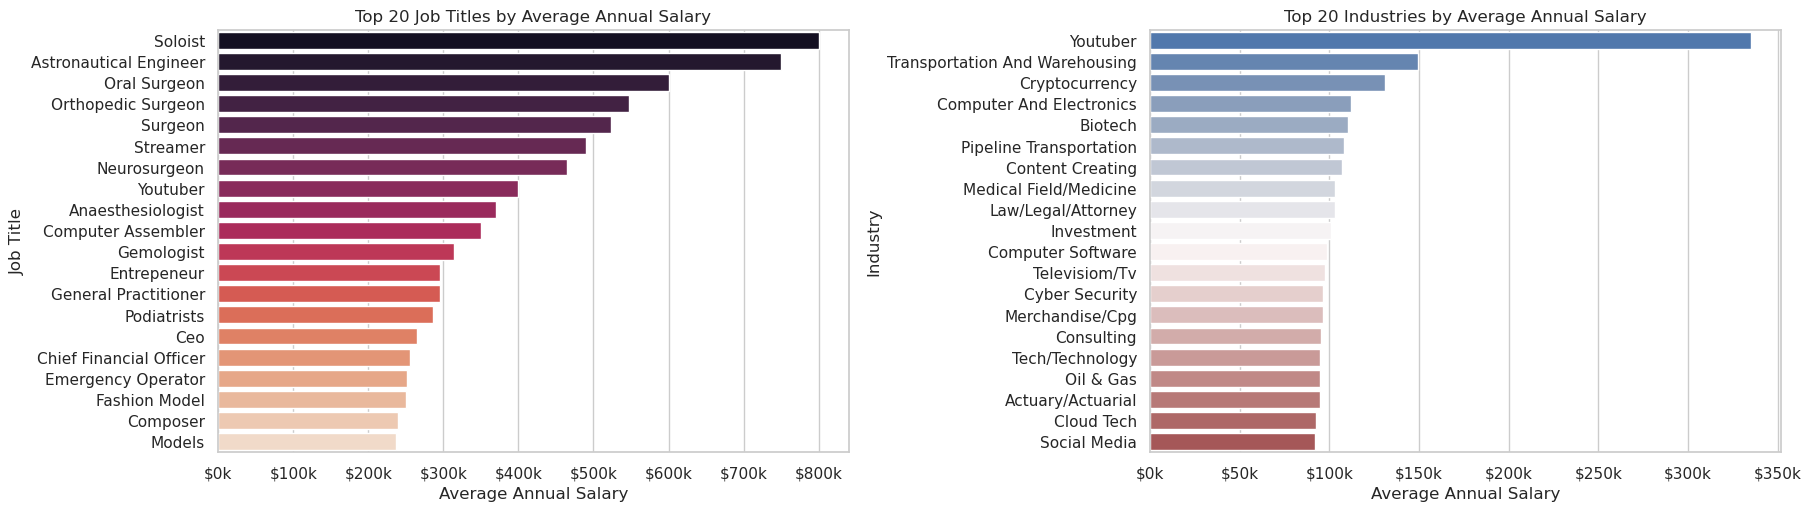

In [20]:
# For visualization purposes, we'll use the original (non-encoded) job titles and industries. Given the large number of unique job titles and industries, we'll focus on the top 20 by average salary for clarity.

avg_salary_job_title = df.groupby('Job Title')['Annual Salary'].mean().nlargest(20).reset_index()

# Average Salary by Industry
avg_salary_industry = df.groupby('Industry')['Annual Salary'].mean().nlargest(20).reset_index()

# Setting up the plots side by side for better comparison
fig, ax = plt.subplots(1, 2, figsize=(18, 5), constrained_layout=True)

# Define the formatter function
def k_dollar_formatter(x, pos):
    return f'${int(x/1000)}k'

# Plot Average Salary by Job Title
sns.barplot(x='Annual Salary', y='Job Title', data=avg_salary_job_title, ax=ax[0], palette='rocket')
ax[0].set_title('Top 20 Job Titles by Average Annual Salary')
ax[0].set_xlabel('Average Annual Salary')
ax[0].set_ylabel('Job Title')
ax[0].xaxis.set_major_formatter(mticker.FuncFormatter(k_dollar_formatter))

# Plot Average Salary by Industry
sns.barplot(x='Annual Salary', y='Industry', data=avg_salary_industry, ax=ax[1], palette='vlag')
ax[1].set_title('Top 20 Industries by Average Annual Salary')
ax[1].set_xlabel('Average Annual Salary')
ax[1].set_ylabel('Industry')
ax[1].xaxis.set_major_formatter(mticker.FuncFormatter(k_dollar_formatter))

plt.show()

**Insights**

**Top 20 Job Titles by Average Annual Salary:**

The job titles are predominantly in specialized, high-skill areas such as healthcare, technology, and business leadership.
Medical professions like surgeons and anesthesiologists rank highly in average annual salary, indicating the high value and demand for these roles.
CEO and Chief Financial Officer positions also appear on the list, which is expected given the high levels of responsibility and expertise required.
Creative and entertainment-related professions such as YouTuber and Streamer have made it into the top 20, reflecting the viability of these career paths in the digital age.
The range in salary spans broadly, suggesting a wide variance in earning potential across different specialized fields.

**Top 20 Industries by Average Annual Salary:**

The industries with the highest average salaries include tech-centric fields like Cyber Security, Cloud Tech, and Social Media, highlighting the lucrative nature of these modern sectors.
Traditional high-paying sectors such as Law/Legal/Attorney, Medical Field/Medicine, and Investment are well-represented.
Content Creating and Youtuber as separate categories emphasize the emerging digital economy's impact on salary trends.
The transportation and warehousing industry tops the list, which may point to high-demand/high-value niches within this sector.

2. **Most Common Job Titles and Industries amongst all participants:**

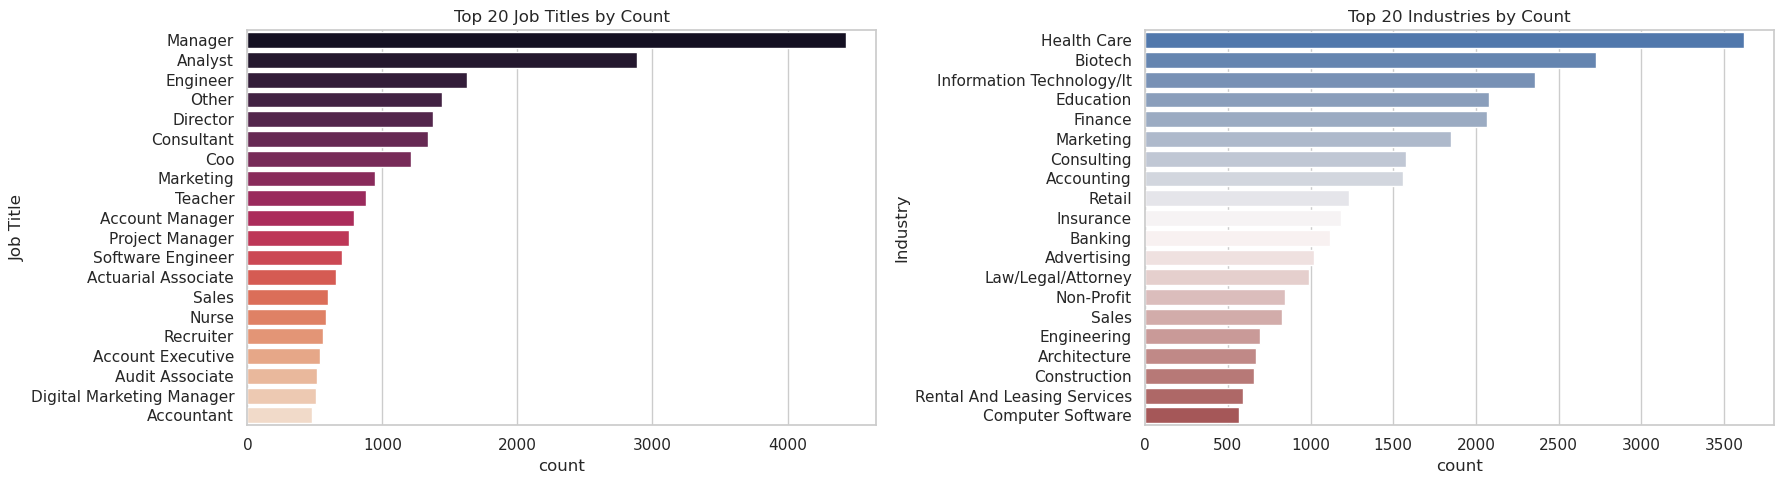

In [8]:
# Get the most common job titles
top_job_titles = df['Job Title'].value_counts().nlargest(20).index.tolist()

# Get the most common industries
top_industries = df['Industry'].value_counts().nlargest(20).index.tolist()

# Filter DataFrame for top job titles and industries
filtered_df = df[df['Job Title'].isin(top_job_titles) | df['Industry'].isin(top_industries)]

# Plot
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

# Plot for Top Job Titles by Count
sns.countplot(y='Job Title', data=df, order=top_job_titles, ax=ax[0], palette='rocket')
ax[0].set_title('Top 20 Job Titles by Count')
ax[0].set_ylabel('Job Title')

# Plot for Top Industries by Count
sns.countplot(y='Industry', data=df, order=top_industries, ax=ax[1], palette='vlag')
ax[1].set_title('Top 20 Industries by Count')
ax[1].set_ylabel('Industry')

plt.tight_layout()
plt.show()

**Insights**

**Top 20 Job Titles by Count:**

"Manager" and "Analyst" are the most common job titles, suggesting these roles are prevalent in the surveyed population.
Technical roles such as "Engineer" and "Software Engineer" also have a significant count, indicating a good representation of the tech sector.
The category labeled "Other" suggests a wide variety of job titles that are not as frequent individually but collectively make up a large segment.
There is a diverse range of represented professions, from "Accountant" to "Digital Marketing Manager," showing the survey’s coverage across different job functions.

**Top 20 Industries by Count:**

The "Computer Software" industry has the highest number of respondents, followed by "Rental and Leasing Services" and "Construction," which shows the dataset's heavy tilt towards these sectors.
"Health Care" and "Biotech" are also well-represented, reflecting the significance of these industries in the job market.
Other industries such as "Information Technology/IT," "Education," and "Finance" show a substantial presence.
The presence of industries like "Non-Profit" and "Sales" lower on the list still indicates a broad coverage of different economic sectors.


1. The survey reveals a broad spectrum of job titles and industries, with certain areas more prominently featured, possibly reflecting job demand or survey demographic reach.
2. The prevalence of generic job titles such as "Manager" and "Analyst" may suggest the need for more detailed role categorization.
3. The dominance of the "Computer Software" industry could point to survey bias or mirror current job market trends favoring tech-related fields.

3. **Exploring the relationship between Average salary vs Education and Experience.**

In [50]:
# Summary of average salary by education level
education_salary_summary = df.groupby('Education')['Annual Salary'].mean().sort_values(ascending=False).map('${:,.2f}'.format)

# Get the summary of the data to see the influence of education level and experience
summary_by_education_and_experience = df.groupby(['Education', 'Experience'])['Annual Salary'].mean().unstack().fillna(0)

# Formatting for better readability
summary_by_education_and_experience = summary_by_education_and_experience.applymap('${:,.2f}'.format)

#DISPLAY
# Print the summary table for education and salary
print("\nSummary of Average salary by Education level:")
print(education_salary_summary)

# Transpose the summary table twice
summary_by_education_and_experience_transposed = summary_by_education_and_experience.T.transpose()

# Print the transposed summary table
print("\nSummary by Education level and Experience:")
print(summary_by_education_and_experience_transposed)


Summary of Average salary by Education level:
Education
Doctoral Degree                     $139,891.74
No Schooling                         $90,856.69
Master's Degree                      $89,031.60
Bachelor's Degree                    $79,372.26
High School Diploma                  $69,680.77
Some college                         $69,060.54
Trade School                         $68,060.24
Associate Degree                     $65,644.08
Some college/High School Diploma     $57,719.75
Name: Annual Salary, dtype: object

Summary by Education level and Experience:
Experience                                 1            2            3            4            5            6            7            8            9            10           11           12           13           14           15           16           17           18           19           20
Education                                                                                                                                  

**Insights**

**Average Salary by Education Level:**

Individuals with a Doctoral Degree earn the highest average annual salary at approximately $139,891.74.
Surprisingly, "No Schooling" is the second highest at $90,856.69, suggesting that formal education is not the only pathway to high-earning roles. This could be influenced by entrepreneurial ventures or industries where practical experience trumps formal education.
As expected, there's a general trend of increasing salary with higher levels of education, with Master's and Bachelor's degrees following closely.
Those with only a High School Diploma, some college education, or Trade School education earn less on average, with the least being "Some college/High School Diploma" at $57,719.75.

**Summary by Education Level and Experience:**

Salary increases with experience across almost all education levels.
There are a few anomalies such as "No Schooling" where the salary peaks significantly at certain experience years, which could be due to outlier salaries or successful individuals without formal education.
For individuals with a Doctoral, Master's, and Bachelor's degree, there's a noticeable trend of salary increases with more experience, peaking at 20 years.
The "Associate Degree" and "Trade School" categories show variability in salary growth with experience, which might reflect the diversity of roles or industries within these categories.
In some cases, such as the "Some college/High School Diploma" group, there's a significant spike in salary at 9 years of experience. Such anomalies may require further investigation to understand the underlying cause—whether it's due to a small sample size, a particular high-paying job title, or data entry errors.
This summary provides a detailed overview of the relationship between education, experience, and salary. It illustrates common trends, like higher education correlating with higher salaries, but also reveals nuances that merit further analysis to understand exceptional cases.

# 4. Most Contributing Categories for high salaries

Correlation between Years of Experience and Annual Salary: 0.3


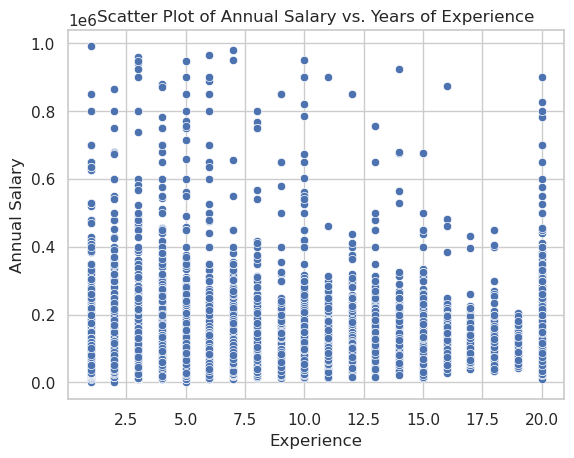

In [42]:
# Calculate the correlation coefficient between years of experience and salary
correlation_experience_salary = df['Experience'].corr(df['Annual Salary'])
print("Correlation between Years of Experience and Annual Salary:", round(correlation_experience_salary, 2))

# Scatter plot to explore relationship between 'Annual Salary' and 'Experience'plt.figure(figsize=(8, 5))
sns.scatterplot(x='Experience', y='Annual Salary', data=df)
plt.title('Scatter Plot of Annual Salary vs. Years of Experience')
plt.show()

**Insights**

The scatter plot of annual salary vs. years of experience suggests there is a positive correlation, though it seems weak (correlation coefficient is approximately 0.30). This implies that while experience does have a positive relationship with salary, it's not the only factor influencing earnings.

From this scatter plot alone, we can infer some general trends, but we should be cautious not to draw definitive conclusions without further statistical analysis, such as calculating the correlation coefficient or conducting regression analysis. Additionally, we must consider the industry context, regional salary standards, and the presence of other factors that could influence salary, which are not depicted in this two-dimensional scatter plot.

At r = 0.30, the correlation is closer to 0 than to 1, so while there is a positive trend, it's not particularly strong. Other factors might be influencing the annual salary, or the relationship might not be linear. It's also worth noting that correlation does not imply causation; a correlation coefficient describes the strength and direction of a linear relationship but doesn't explain why the relationship exists or whether one variable directly affects the other.

Given a correlation coefficient of 0.29, which indicates only a weak positive linear relationship between years of experience and annual salary, it would be prudent to consider a predictive model that can capture more complex relationships and include multiple factors, as the salary is likely influenced by a combination of attributes.

**Reasons for Choosing Gradient Boosting:**

1. Non-linearity: Suitable for capturing the non-linear and complex relationships seen in the salary data distribution.
2. Feature Interactions: Efficiently models interactions between various factors such as experience, education, and job title without needing explicit interaction terms.
3. Robust to Outliers: Handles potential outliers in the data well, which is crucial given the presence of exceptionally high salaries for certain experience levels.
4. Flexibility: Offers hyperparameter tuning options to optimize model performance and address issues like overfitting or underfitting.
5. Variable Importance: Provides valuable insights into the most predictive features of salary, enhancing understanding beyond mere experience.
6. Incremental Learning: Adopts a stage-wise model building approach, focusing on instances that were previously difficult to predict, leading to a refined model.

Gradient boosting is thus selected for modeling the salary data due to its ability to better understand and predict the complex dynamics of salary variations, acknowledging the limitations of a simple linear correlation.

The third notebook in this project uses Gradient Boosting to predict salaries based on a combination of variables. 